In [1]:
#Parker importeres:
import numpy as np
import matplotlib.pyplot as plt

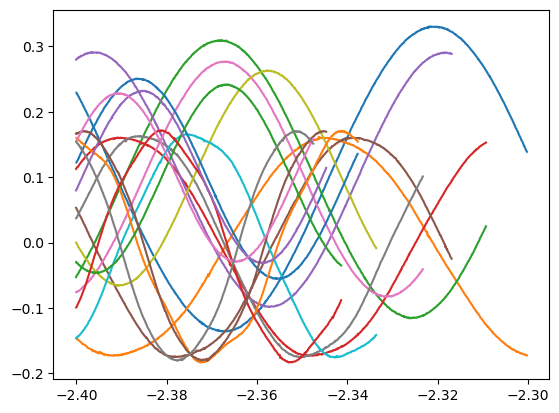

In [24]:
#Der laves en liste til faseforskydningerne:
Faseforskydning = []
Amplitude_A = []
Amplitude_B = []

#Frekvenserne der er målt ved:
frek_a = np.array([10,11,12,13,15,16,17,18,19])
frek_b = np.array([10,17,18,40,55])*100

# #Der gennemgås datasættes for hver eneste frekvens:
# for Hz in frek_b:
#     Rådata = np.genfromtxt(f"{Hz}.csv" , delimiter=',' , skip_header=2)
    
#     #Dataet defineres i seperate mapper:
#     Tid = Rådata[:,0]
#     CA = Rådata[:,1]
#     CB = Rådata[:,2] * 10**(-3)

#     #Periden og det totale antal af svinginger findes:
#     Periode = 1 / (Hz) * 10**3
#     Antal_svingninger = (Tid[-1]-Tid[0]) / Periode

#     #Der laves en liste seperat til kanal A og B:
#     SvingA = []
#     SvingB = []
#     #Der loopes over det totale antal af svingninger:
#     for i in range(0,int(Antal_svingninger)):
#         #Der laves en maske til at opdele bølgerne i de enkelte perioder:
#         Maske = (Tid[0] + Periode * i <Tid) & (Tid[0]+ Periode * (i+1) >Tid)
        
#         #Der laves en seperat liste til dataet indenfor hver periode
#         xx = Tid[Maske]
#         yyA = CA[Maske]
#         yyB = CB[Maske]

#         #Hver enkelt svingning for de to kanaler A og B gemmes i seperate lister:
#         SvingA.append([xx,yyA])
#         SvingB.append([xx,yyB])
    
#     #Der plottes bare for se, om det ser okay ud:
#     plt.plot(*SvingA[0])
#     plt.plot(*SvingB[0])


#     #Der findes nu faseforskydningen mellem kanal A og B for hver periode:
#     Amp_A = []
#     Amp_B = []
#     For = []
#     for x in range(0,int(Antal_svingninger)):
#         For.append(  ( 2*np.pi / Periode * (Tid[ np.where(yyA == np.max(yyA))[0][0] ] - Tid[ np.where(yyB == np.max(yyB))[0][0] ] )  ) )
#         Amp_B.append(np.max(SvingB[x][1]))
#         Amp_A.append(np.max(SvingA[x][1]))


#     #Frekvensen, den gennemsnitlige faseforskygning og den statistiske usikkerhed gemmes i en seperat liste:
#     Faseforskydning.append([Hz , np.mean(For) , np.std(For)])
#     Amplitude_B.append([Hz , np.mean(Amp_B) , np.std(Amp_B)])
#     Amplitude_A.append([Hz , np.mean(Amp_A) , np.std(Amp_A)])

#Der gennemgås datasættes for hver eneste frekvens:
for Hz in frek_a:
    Rådata = np.genfromtxt(f"{Hz}.csv" , delimiter=',' , skip_header=2)
    
    #Dataet defineres i seperate mapper:
    Tid = Rådata[:,0]
    CA = Rådata[:,1]
    CB = Rådata[:,2]

    #Periden og det totale antal af svinginger findes:
    Periode = 1 / (Hz*1000) * 10**3
    Antal_svingninger = (Tid[-1]-Tid[0]) / Periode

    #Der laves en liste seperat til kanal A og B:
    SvingA = []
    SvingB = []
    #Der loopes over det totale antal af svingninger:
    for i in range(0,int(Antal_svingninger)):
        #Der laves en maske til at opdele bølgerne i de enkelte perioder:
        Maske = (Tid[0] + Periode * i <Tid) & (Tid[0]+ Periode * (i+1) >Tid)
        
        #Der laves en seperat liste til dataet indenfor hver periode
        xx = Tid[Maske]
        yyA = CA[Maske]
        yyB = CB[Maske]

        #Hver enkelt svingning for de to kanaler A og B gemmes i seperate lister:
        SvingA.append([xx,yyA])
        SvingB.append([xx,yyB])
    
    #Der plottes bare for se, om det ser okay ud:
    plt.plot(*SvingA[0])
    plt.plot(*SvingB[0])


    #Der findes nu faseforskydningen mellem kanal A og B for hver periode:
    Amp_A = []
    Amp_B = []
    For = []
    for x in range(0,int(Antal_svingninger)):
        For.append(  ( 2*np.pi / Periode * (Tid[ np.where(yyA == np.max(yyA))[0][0] ] - Tid[ np.where(yyB == np.max(yyB))[0][0] ] )  ) )
        Amp_B.append(np.max(SvingB[x][1]))
        Amp_A.append(np.max(SvingA[x][1]))


    #Frekvensen, den gennemsnitlige faseforskygning og den statistiske usikkerhed gemmes i en seperat liste:
    Faseforskydning.append([Hz*1000 , np.mean(For) , np.std(For)])
    Amplitude_B.append([Hz*1000 , np.mean(Amp_B) , np.std(Amp_B)])
    Amplitude_A.append([Hz*1000 , np.mean(Amp_A) , np.std(Amp_A)])

In [ ]:
def func_amplitudeforhold(w):
    return 1 / np.sqrt( 1 + Q**2 * ( w  - (1 / w) )**2 )

xx = np.linspace(0,1 * 10**(6),10000) / (2*np.pi*w_max)
yy = func_amplitudeforhold(xx)

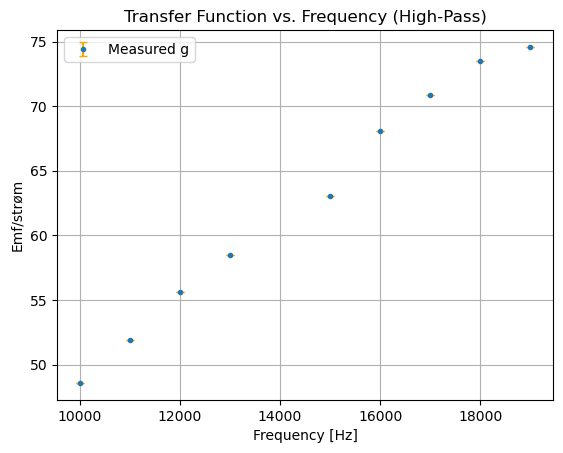

In [25]:
x = []
y = []
u = []

for k in range(len(Amplitude_B)):
    x.append(Amplitude_B[k][0])
    y.append(Amplitude_B[k][1]/(Amplitude_A[k][1]/100))
    u.append(0)

plt.errorbar(x,y,u , fmt='.' , label='Measured g' , ecolor='orange' , capsize=3)
#plt.plot(xx,yy, label = 'Transfer Function', color='red')
plt.legend(loc='upper left',fontsize = 10)
plt.xlabel('Frequency [Hz]', fontsize = 10)
plt.title(f'Transfer Function vs. Frequency (High-Pass)')
plt.ylabel('Emf/strøm', fontsize = 10);
plt.grid()

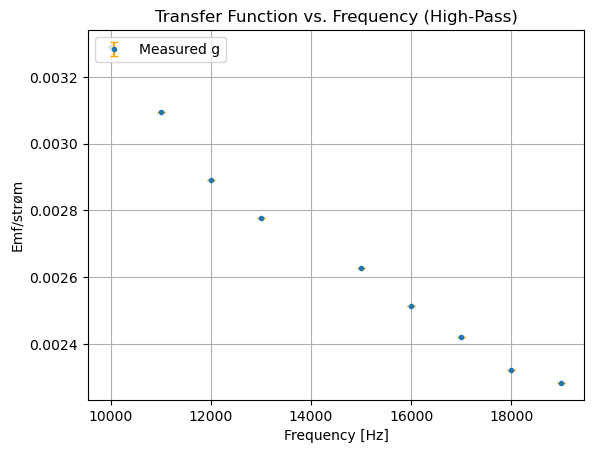

In [27]:
x = []
y = []
u = []

for k in range(len(Amplitude_B)):
    x.append(Amplitude_B[k][0])
    y.append((Amplitude_A[k][1]/100))
    u.append(0)

plt.errorbar(x,y,u , fmt='.' , label='Measured g' , ecolor='orange' , capsize=3)
#plt.plot(xx,yy, label = 'Transfer Function', color='red')
plt.legend(loc='upper left',fontsize = 10)
plt.xlabel('Frequency [Hz]', fontsize = 10)
plt.title(f'Transfer Function vs. Frequency (High-Pass)')
plt.ylabel('Emf/strøm', fontsize = 10);
plt.grid()

In [28]:
0.004/4000

1e-06

In [ ]:
#Der gennemgås datasættes for hver eneste frekvens:
for Hz in frek_b:
    Rådata = np.genfromtxt(f"{Hz}Hz.csv" , delimiter=',' , skip_header=2)
    
    #Dataet defineres i seperate mapper:
    Tid = Rådata[:,0]
    CA = Rådata[:,1]
    CB = Rådata[:,2]

    #Periden og det totale antal af svinginger findes:
    Periode = 1 / Hz * 10**6
    Antal_svingninger = (Tid[-1]-Tid[0]) / Periode

    #Der laves en liste seperat til kanal A og B:
    SvingA = []
    SvingB = []
    #Der loopes over det totale antal af svingninger:
    for i in range(0,int(Antal_svingninger)):
        #Der laves en maske til at opdele bølgerne i de enkelte perioder:
        Maske = (Tid[0] + Periode * i <Tid) & (Tid[0]+ Periode * (i+1) >Tid)
        
        #Der laves en seperat liste til dataet indenfor hver periode
        xx = Tid[Maske]
        yyA = CA[Maske]
        yyB = CB[Maske]

        #Hver enkelt svingning for de to kanaler A og B gemmes i seperate lister:
        SvingA.append([xx,yyA])
        SvingB.append([xx,yyB])
    #Der plottes bare for se, om det ser okay ud:
    plt.plot(*SvingA[0])
    plt.plot(*SvingB[0])


    #Der findes nu faseforskydningen mellem kanal A og B for hver periode:
    Amp_A = []
    Amp_B = []
    For = []
    for x in range(0,int(Antal_svingninger)):
        For.append(  ( 2*np.pi / Periode * (Tid[ np.where(yyA == np.max(yyA))[0][0] ] - Tid[ np.where(yyB == np.max(yyB))[0][0] ] )  ) )
        Amp_B.append(np.max(SvingB[x][1]))
        Amp_A.append(np.max(SvingA[x][1]))


    #Frekvensen, den gennemsnitlige faseforskygning og den statistiske usikkerhed gemmes i en seperat liste:
    Faseforskydning.append([Hz , np.mean(For) , np.std(For)])
    Amplitude_B.append([Hz , np.mean(Amp_B) , np.std(Amp_B)])
    Amplitude_A.append([Hz , np.mean(Amp_A) , np.std(Amp_A)])